

# ¿Qué hay más en el catálogo, películas o series?
# ¿En qué años hay más contenido, es decir, de qué añoshay mayor cantidad de contenido?
# ¿Qué género tiene más contenido?
# ¿Cuáles son los géneros únicos, no mezclados?
# ¿Cuántos elementos hay por cada categoría única?
# ¿Cómo se distribuye el contenido por cada plataforma?
# Y si comparamos por serie y películas, ¿Cuántos hay en cada plataforma?
# ¿Qué tan viejo / nuevo es el contenido total?
# Y si lo desglozamos por plataforma, ¿cómo sería?
# Grafiquemos los géneros más populares por plataforma.






In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [254]:
import pandas as pd
all_datos = pd.read_csv('streaming_t.csv', index_col=0)
all_datos.head(2)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,HBO Max
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0,HBO Max


In [255]:
all_datos.shape


(23331, 16)

In [256]:
all_datos.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'service'],
      dtype='object')

In [257]:
all_datos.isna().sum()

id                          0
title                       1
type                        0
description               168
release_year                0
age_certification       12153
runtime                     0
genres                      0
production_countries        0
seasons                 18130
imdb_id                  1998
imdb_score               2555
imdb_votes               2595
tmdb_popularity           742
tmdb_score               3265
service                     0
dtype: int64

# ¿Qué hay más en el catálogo, películas o series?

In [258]:

peli_or_seri=all_datos.groupby(["type"])["id"].count()
peli_or_seri

type
MOVIE    18130
SHOW      5201
Name: id, dtype: int64

<AxesSubplot:xlabel='type'>

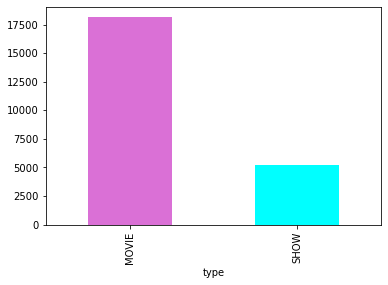

In [259]:
peli_or_seri.plot(kind="bar", color=["orchid","cyan"])


## hay más peliculas

# ¿En qué años hay más contenido, es decir, de qué años hay mayor cantidad de contenido?

In [260]:
year_max_content=all_datos.groupby(["release_year"])["id"].count()
year_max_content

release_year
1901       1
1902       2
1903       1
1904       1
1906       2
        ... 
2018    1829
2019    2090
2020    1986
2021    2104
2022     423
Name: id, Length: 116, dtype: int64

<AxesSubplot:xlabel='release_year'>

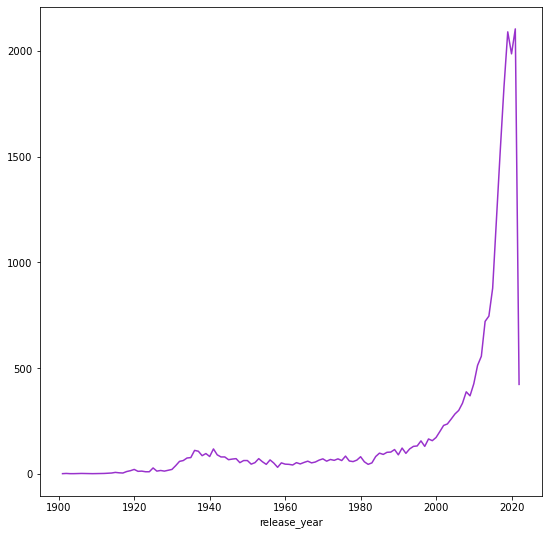

In [261]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
year_max_content.plot(color="darkorchid")


In [262]:
year_max_content[year_max_content==2104]

release_year
2021    2104
Name: id, dtype: int64

In [263]:
max(year_max_content)


2104

# En 2021

# ¿Qué género tiene más contenido?

In [264]:
gen_max=all_datos[["genres", "id"]].groupby(["genres"]).count()
gen_max

,id
genres,
"['action', 'animation', 'comedy', 'crime', 'drama']",1
"['action', 'animation', 'comedy', 'crime', 'family', 'fantasy', 'scifi']",1
"['action', 'animation', 'comedy', 'crime']",1
"['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'scifi']",2
"['action', 'animation', 'comedy', 'drama', 'family', 'western', 'documentation']",1
...,...
"['western', 'war', 'drama', 'history', 'romance']",2
"['western', 'war', 'romance']",1
"['western', 'war']",3


In [265]:
gen_max.sort_values(by="id", ascending=False)


,id
genres,
['documentation'],1682
['comedy'],1663
['drama'],1603
[],412
"['comedy', 'drama']",379
...,...
"['drama', 'european', 'comedy', 'romance', 'war']",1
"['drama', 'european', 'comedy', 'romance']",1
"['drama', 'european', 'comedy', 'war']",1


## documentations es el que tiene más contenido

# ¿Cuáles son los géneros únicos, no mezclados?

In [266]:
generos_unicos=[]
a=list(set(all_datos["genres"]))
for row in a:
    for item in eval(row): #eval viene de evaluation
        if not item in generos_unicos:
            generos_unicos.append(item)
generos_unicos

['action',
 'drama',
 'crime',
 'thriller',
 'history',
 'documentation',
 'war',
 'horror',
 'sport',
 'animation',
 'comedy',
 'western',
 'fantasy',
 'family',
 'scifi',
 'european',
 'music',
 'reality',
 'romance']

# ¿Cuántos elementos hay por cada categoría única?

In [267]:
for genero in generos_unicos:
    all_datos[genero]=all_datos.apply(lambda row: 1 if genero in eval(row["genres"]) else 0, axis=1)
    

In [268]:
generos_count=all_datos[generos_unicos].sum(axis=0)
generos_count

action            4308
drama            10527
crime             3080
thriller          4477
history            983
documentation     3568
war                708
horror            1954
sport              631
animation         2147
comedy            8032
western            843
fantasy           2189
family            2749
scifi             2217
european          1647
music             1065
reality            609
romance           3852
dtype: int64

In [279]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


<AxesSubplot:>

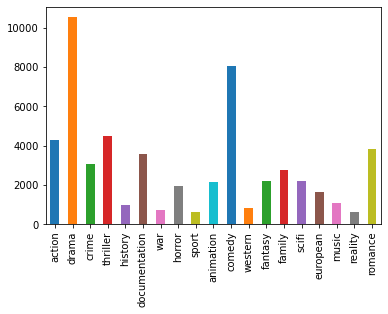

In [291]:

import matplotlib.colors as mcolors
generos_count.plot.bar(color=mcolors.TABLEAU_COLORS, alpha=1)

# ¿Cómo se distribuye el contenido por cada plataforma?

In [283]:
plataforma=all_datos.groupby("service")["id"].count()
plataforma

service
Amazon Prime    9871
Disney+         1535
HBO Max         3294
Netflix         5806
Paramount+      2825
Name: id, dtype: int64

In [214]:
type(plataforma)

pandas.core.series.Series

<AxesSubplot:xlabel='service'>

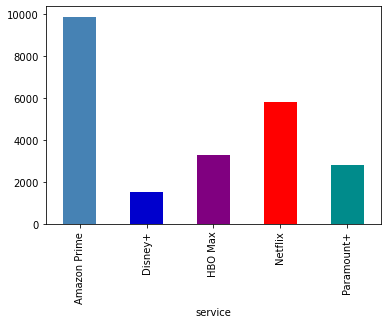

In [284]:
plataforma.plot( kind="bar", color=["steelblue","mediumblue","purple","red","darkcyan"])



# Y si comparamos por serie y películas, ¿Cuántos hay en cada plataforma?

In [292]:
plataforma_tipo=all_datos[["service","type", "id"]].groupby(["service","type"]).count()
plataforma_tipo

id
service      type       
Amazon Prime MOVIE  8514
             SHOW   1357
Disney+      MOVIE  1120
             SHOW    415
HBO Max      MOVIE  2538
             SHOW    756
Netflix      MOVIE  3759
             SHOW   2047
Paramount+   MOVIE  2199
             SHOW    626

<AxesSubplot:xlabel='service'>

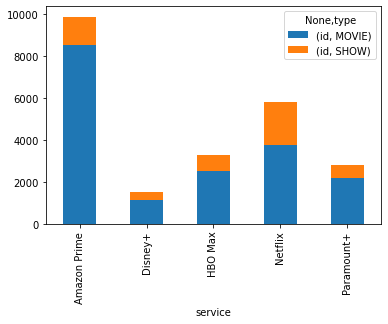

In [293]:
plataforma_tipo.unstack().plot(kind="bar",stacked=True)

# ¿Qué tan viejo / nuevo es el contenido total?

In [209]:
all_datos["release_year"].agg(["min","max"])

min    1901
max    2022
Name: release_year, dtype: int64

In [16]:
all_datos["release_year"].max()

2022

In [287]:
all_datos["release_year"].min()

1901

# Y si lo desglozamos por plataforma, ¿cómo sería?

In [294]:
plataforma_year=all_datos[["release_year","service"]].groupby(["service"]).agg(["min","max"])
plataforma_year

release_year      
                      min   max
service                        
Amazon Prime         1912  2022
Disney+              1928  2022
HBO Max              1901  2022
Netflix              1945  2022
Paramount+           1912  2022

In [295]:
plataforma_year_min=all_datos[["release_year","service"]].groupby(["service"]).min()
plataforma_year_min

,release_year
service,
Amazon Prime,1912
Disney+,1928
HBO Max,1901
Netflix,1945
Paramount+,1912


In [297]:
plataforma_year_max=all_datos[["release_year","service"]].groupby(["service"]).max()
plataforma_year_max

,release_year
service,
Amazon Prime,2022
Disney+,2022
HBO Max,2022
Netflix,2022
Paramount+,2022


# Grafiquemos los géneros más populares por plataforma.

In [298]:
plataformas=["Amazon Prime","Disney+","HBO Max","Netflix","Paramount+"]
full_df={"plataforma":[], "genero":[], "popularidad":[]}

for plataforma in plataformas:
    for genero in generos_unicos:
        subdf=all_datos[(all_datos[genero]==1 )& (all_datos["service"]==plataforma)]
        popularidad=subdf["tmdb_popularity"].max()
        full_df["plataforma"].append(plataforma)
        full_df["genero"].append(genero)
        full_df["popularidad"].append(popularidad)
        
full_df2=pd.DataFrame(full_df)
full_df2
        
        
        

,plataforma,genero,popularidad
0,Amazon Prime,action,893.650
1,Amazon Prime,drama,389.431
2,Amazon Prime,crime,893.650
3,Amazon Prime,thriller,1437.906
4,Amazon Prime,history,344.245
...,...,...,...
90,Paramount+,scifi,4579.160
91,Paramount+,european,71.720
92,Paramount+,music,76.049
93,Paramount+,reality,116.296


In [299]:
for plataforma in plataformas:
    aa=full_df2[full_df2["plataforma"]==plataforma]["popularidad"].max()
    print(plataforma, aa)

Amazon Prime 1437.906
Disney+ 9323.832
HBO Max 4447.894
Netflix 1823.374
Paramount+ 4579.16


In [300]:

full_df3=full_df2.groupby("plataforma").max()
full_df3

,genero,popularidad
plataforma,,
Amazon Prime,western,1437.906
Disney+,western,9323.832
HBO Max,western,4447.894
Netflix,western,1823.374
Paramount+,western,4579.160


<AxesSubplot:xlabel='plataforma'>

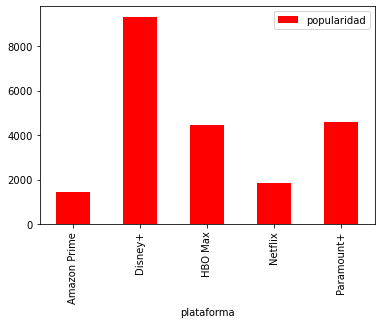

In [302]:
full_df3.plot.bar(color="red")

In [239]:
X=len("plataforma")
X
Y=len("genero")
Y

6

In [303]:
full_df3.reset_index()["plataforma"]

0    Amazon Prime
1         Disney+
2         HBO Max
3         Netflix
4      Paramount+
Name: plataforma, dtype: object

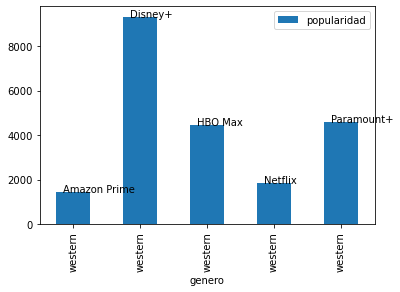

In [307]:
full_df3.plot.bar(x="genero",y="popularidad")
for x,y,t in zip([0,1,2,3,4],list(full_df3["popularidad"]),list(full_df3.reset_index()["plataforma"])):
    plt.text(x-0.15,y,t)
plt.show()

In [306]:
full_df3.plot.bar(x="plataforma",y="popularidad")
for x,y,t in zip([0,1,2,3,4],list(full_df3["plataforma"]),list(full_df3.reset_index()["genero"])):
    plt.text(x-0.15,y,t)
plt.show()

KeyError: 'plataforma'

# Finalmente, planteése una pregunta con estos datos y contestela explorándolos.

In [270]:
all_datos.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'service', 'reality', 'romance', 'drama', 'comedy',
       'scifi', 'action', 'fantasy', 'european', 'animation', 'thriller',
       'family', 'documentation', 'horror', 'crime', 'western', 'sport',
       'history', 'war', 'music'],
      dtype='object')

# ¿cual es la cantidad de peliculas y series por año?

<AxesSubplot:xlabel='release_year'>

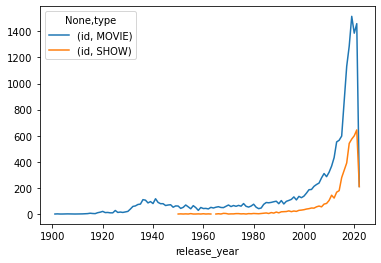

In [320]:
aaa=all_datos[["type","release_year","id"]].groupby(["release_year","type"]).count()
aaa.unstack().plot()
#plt.xticks(np.arange("release_year", step=5))


In [331]:
aaa

id
release_year type       
1901         MOVIE     1
1902         MOVIE     2
1903         MOVIE     1
1904         MOVIE     1
1906         MOVIE     2
...                  ...
2020         SHOW    600
2021         MOVIE  1459
             SHOW    645
2022         MOVIE   212
             SHOW    211

[191 rows x 1 columns]